In [1]:
import pandas as pd
# Imports
import pandas as pd
import numpy as np
#from keras.models import Sequential
#from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import KernelPCA



from sklearn.model_selection import KFold
#from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt

#from imblearn.over_sampling import SMOTE

# Load the data from CSV files into DataFrames
zone_data_1A = pd.read_csv('zone_data_1A_clustered.csv')
zone_data_7 = pd.read_csv('zone_data_7_clustered.csv')
zone_data_6 = pd.read_csv('zone_data_6_clustered.csv')

# Separate zone_data_1A into two different DataFrames based on the cluster assignment
zone_data_1A_top = zone_data_1A[zone_data_1A['Cluster'] == 0]
#zone_data_1A_bottom = zone_data_1A[zone_data_1A['Cluster'] == 1]

zone_data_7_top = zone_data_7[zone_data_7['Cluster'] == 0]
#zone_data_7 = zone_data_7[zone_data_7['Cluster'] == 1]

zone_data_6_top = zone_data_6[zone_data_6['Cluster'] == 1]
#zone_data_6 = zone_data_6[zone_data_6['Cluster'] == 0]

# Copy the data to avoid SettingWithCopyWarning
zone_data_1A_top_sorted = zone_data_1A_top.copy()
#zone_data_1A_bottom_sorted = zone_data_1A_bottom.copy()

# Copy the data for zone 6 and zone 7 to avoid SettingWithCopyWarning
zone_data_6_top_sorted = zone_data_6_top.copy()
#zone_data_6_bottom_sorted = zone_data_6.copy()

zone_data_7_top_sorted = zone_data_7_top.copy()
#zone_data_7_bottom_sorted = zone_data_7.copy()

# Order the data by 'Create_date_ordinal' from lowest to highest
zone_data_1A_top_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)
#zone_data_1A_bottom_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)

# Order the data by 'Create_date_ordinal' from lowest to highest
zone_data_6_top_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)
#zone_data_6_bottom_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)

zone_data_7_top_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)
#zone_data_7_bottom_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)






/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary for Top Cluster:
                               SARIMAX Results                                
Dep. Variable:       Price Per ML ($)   No. Observations:                 9414
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -67222.727
Date:                Wed, 15 May 2024   AIC                         134457.455
Time:                        22:56:11   BIC                         134500.354
Sample:                             0   HQIC                        134472.020
                               - 9414                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2567.5643   1385.679      1.853      0.064    -148.316    5283.444
ar.L1          0.5313      0.104      5.124      0.000       0.328       0.734
ar.L2          

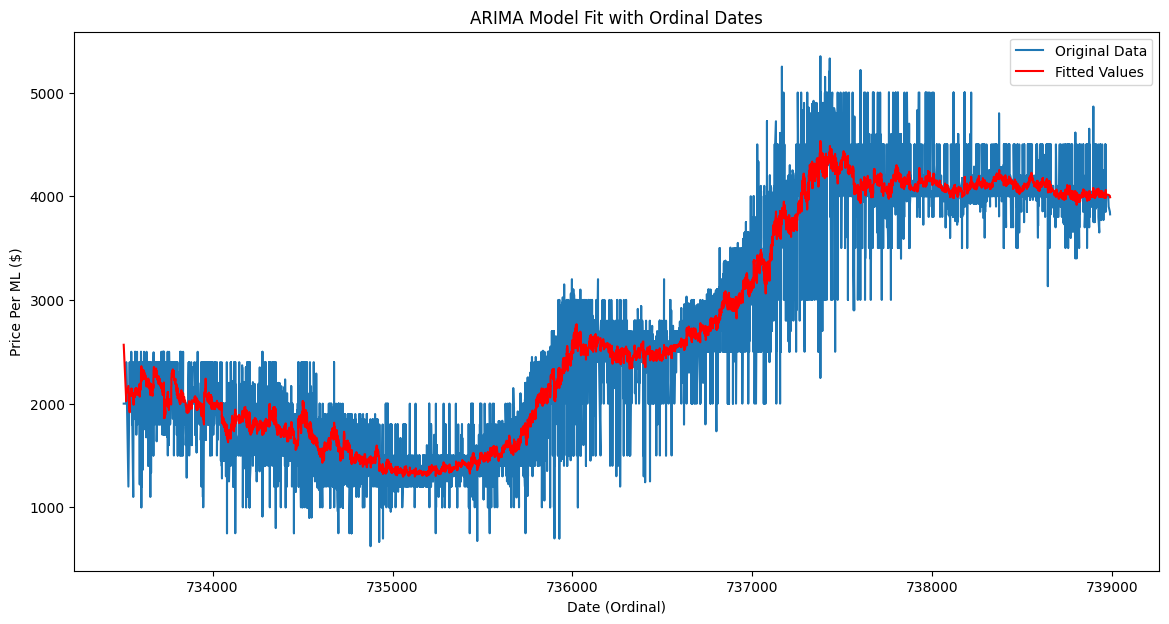

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


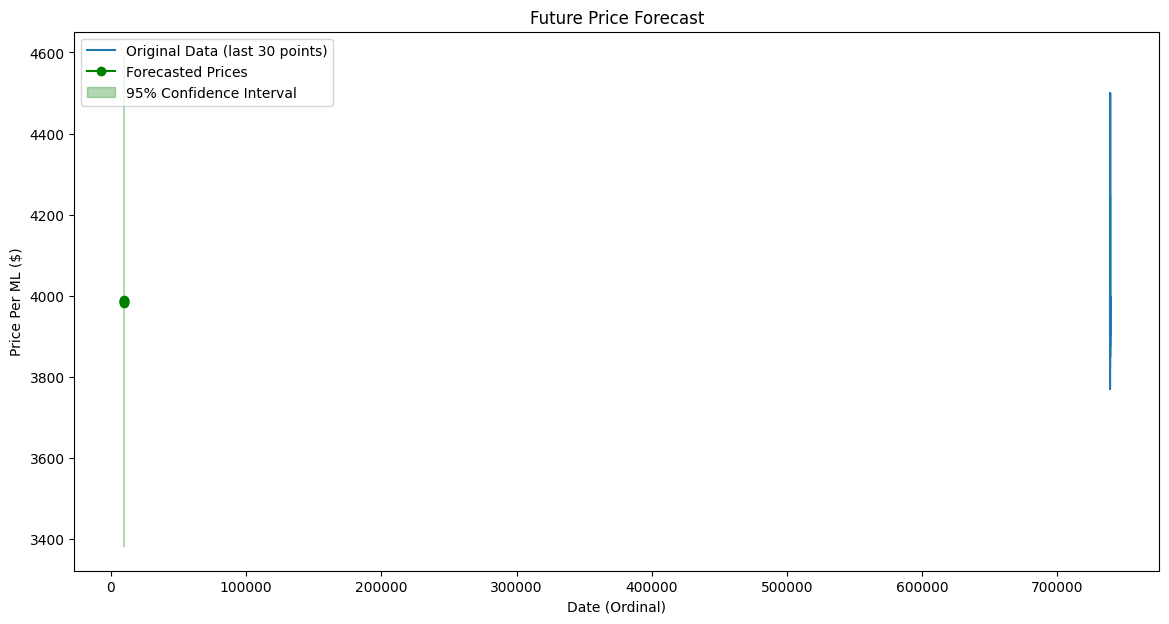

In [2]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

series_top = zone_data_1A_top_sorted.set_index('Create_date_ordinal')['Price Per ML ($)']

# Fit the ARIMA model to the data
arima_model_top = ARIMA(series_top, order=(2, 0, 2))
fitted_model_top = arima_model_top.fit()

# Print the summary of the model
print("ARIMA Model Summary for Top Cluster:")
print(fitted_model_top.summary())

# Plot the original data and the fitted values
plt.figure(figsize=(14, 7))
plt.plot(series_top.index, series_top, label='Original Data')
plt.plot(series_top.index, fitted_model_top.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model Fit with Ordinal Dates')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Price Per ML ($)')
plt.legend()
plt.show()

# Forecast future prices
n_steps = 5  # Number of steps to forecast
forecast = fitted_model_top.get_forecast(steps=n_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plotting the forecast alongside the original series
plt.figure(figsize=(14, 7))
plt.plot(series_top.index[-30:], series_top[-30:], label='Original Data (last 30 points)')
plt.plot(forecast_mean.index, forecast_mean, color='green', marker='o', label='Forecasted Prices')
plt.fill_between(forecast_mean.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.3, label='95% Confidence Interval')
plt.title('Future Price Forecast')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Price Per ML ($)')
plt.legend()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be give

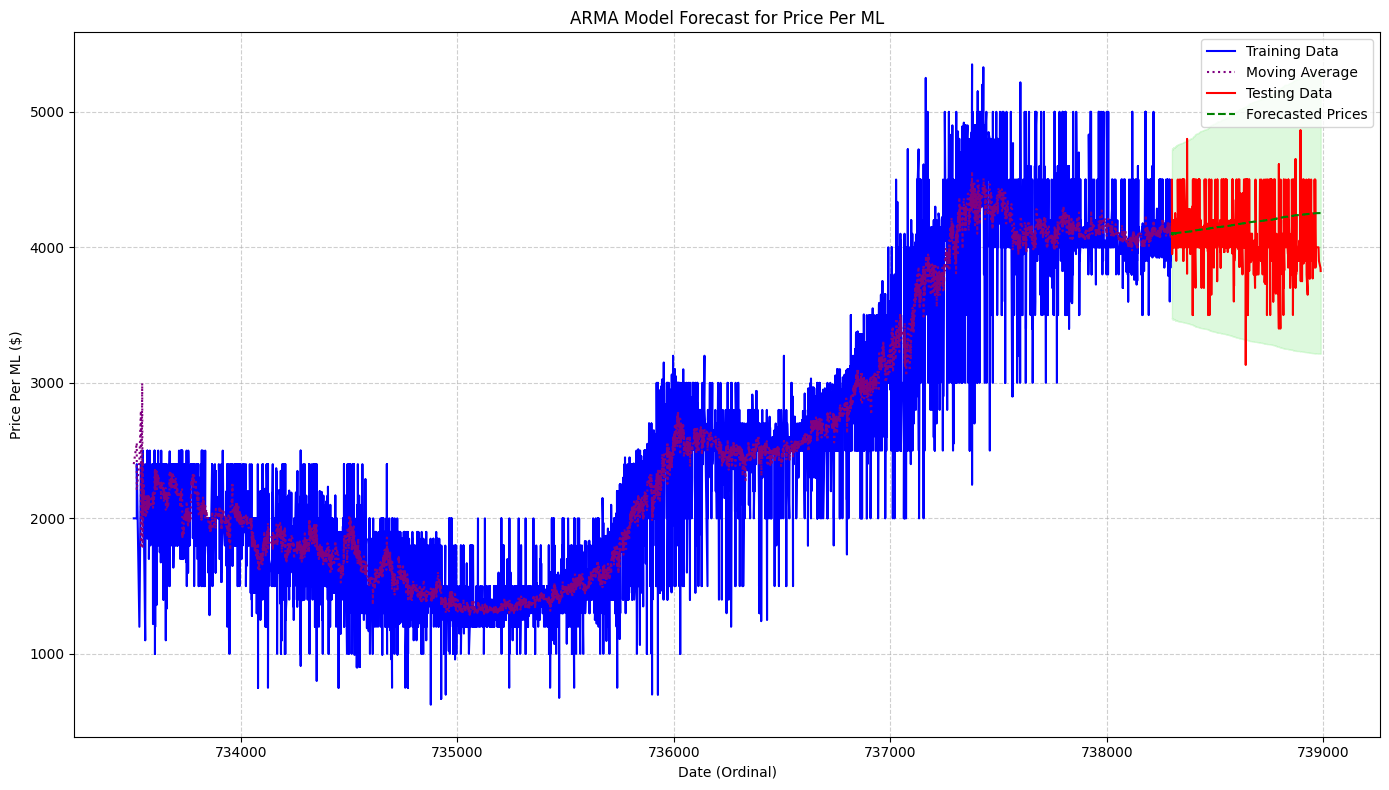

Confidence intervals generated successfully.
Model Summary:
                               SARIMAX Results                                
Dep. Variable:       Price Per ML ($)   No. Observations:                 8472
Model:               ARIMA(10, 0, 10)   Log Likelihood              -60659.660
Date:                Wed, 15 May 2024   AIC                         121363.320
Time:                        22:56:28   BIC                         121518.271
Sample:                             0   HQIC                        121416.209
                               - 8472                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2400.0728   1627.213      1.475      0.140    -789.205    5589.351
ar.L1         -0.3926      0.611     -0.642      0.521      -1.591     

In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def build_arma_model(data, order):
    from statsmodels.tsa.arima.model import ARIMA
    # ARMA model is a special case of ARIMA with no differencing (d=0)
    model = ARIMA(data, order=(order[0], order[1], order[2]), enforce_stationarity=False)
    fitted_model = model.fit()
    return fitted_model

def forecast_and_simulate(model, steps=1000):
    # Get the forecast result
    forecast_result = model.get_forecast(steps=steps)
    forecast_mean = forecast_result.predicted_mean

    # Convert MultiIndex DataFrame to standard column format
    conf_intervals = forecast_result.conf_int()
    conf_intervals.columns = ['lower', 'upper']

    return forecast_mean, conf_intervals

# Assuming the 'Price Per ML ($)' column contains the data of interest
series_data = zone_data_1A_top_sorted.set_index('Create_date_ordinal')['Price Per ML ($)']

# Split data into training and testing sets using train_test_split
# Note: shuffle=False is crucial for time series data to maintain the temporal order
train_data, test_data = train_test_split(series_data, test_size=0.1, shuffle=False)

# Build ARMA model on training data
arma_model = build_arma_model(train_data, order=(10, 0, 10))

# Simulate future prices on test data
forecast_series, conf_df = forecast_and_simulate(arma_model, steps=len(test_data))

# Visualization
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(train_data.index, train_data, label="Training Data", color='blue')

# Plot moving average line using fitted values
plt.plot(train_data.index, arma_model.fittedvalues, label="Moving Average", color='purple', linestyle=':')


# Plot testing data
plt.plot(test_data.index, test_data, label="Testing Data", color='red')

# Plot forecasted data
plt.plot(test_data.index, forecast_series, label="Forecasted Prices", linestyle='--', color='green')

# Fill between for confidence intervals
plt.fill_between(test_data.index, conf_df['lower'], conf_df['upper'], alpha=0.3, color='lightgreen')

# Add gridlines for clarity
plt.grid(True, linestyle='--', alpha=0.6)

# Add labels and legend
plt.xlabel("Date (Ordinal)")
plt.ylabel("Price Per ML ($)")
plt.legend()

# Title and show plot
plt.title("ARMA Model Forecast for Price Per ML")
plt.tight_layout()
plt.show()

# Validate model parameters and convergence
if not arma_model.mle_retvals['converged']:
    print("Warning: Model did not converge. Check model parameters and data.")
else:
    print("Model converged successfully.")

# Validate forecast intervals
if conf_df['lower'].isnull().any() or conf_df['upper'].isnull().any():
    print("Warning: Confidence intervals contain null values. Check forecast outputs.")
else:
    print("Confidence intervals generated successfully.")
# Display model fit summary
print("Model Summary:")
print(arma_model.summary())

# Calculate and display error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate errors on the test data
mse = mean_squared_error(test_data, forecast_series)
mae = mean_absolute_error(test_data, forecast_series)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

from sklearn.metrics import r2_score
r_squared = r2_score(test_data, forecast_series)
print("R-squared:", r_squared)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be give

ValueError: With n_samples=0, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

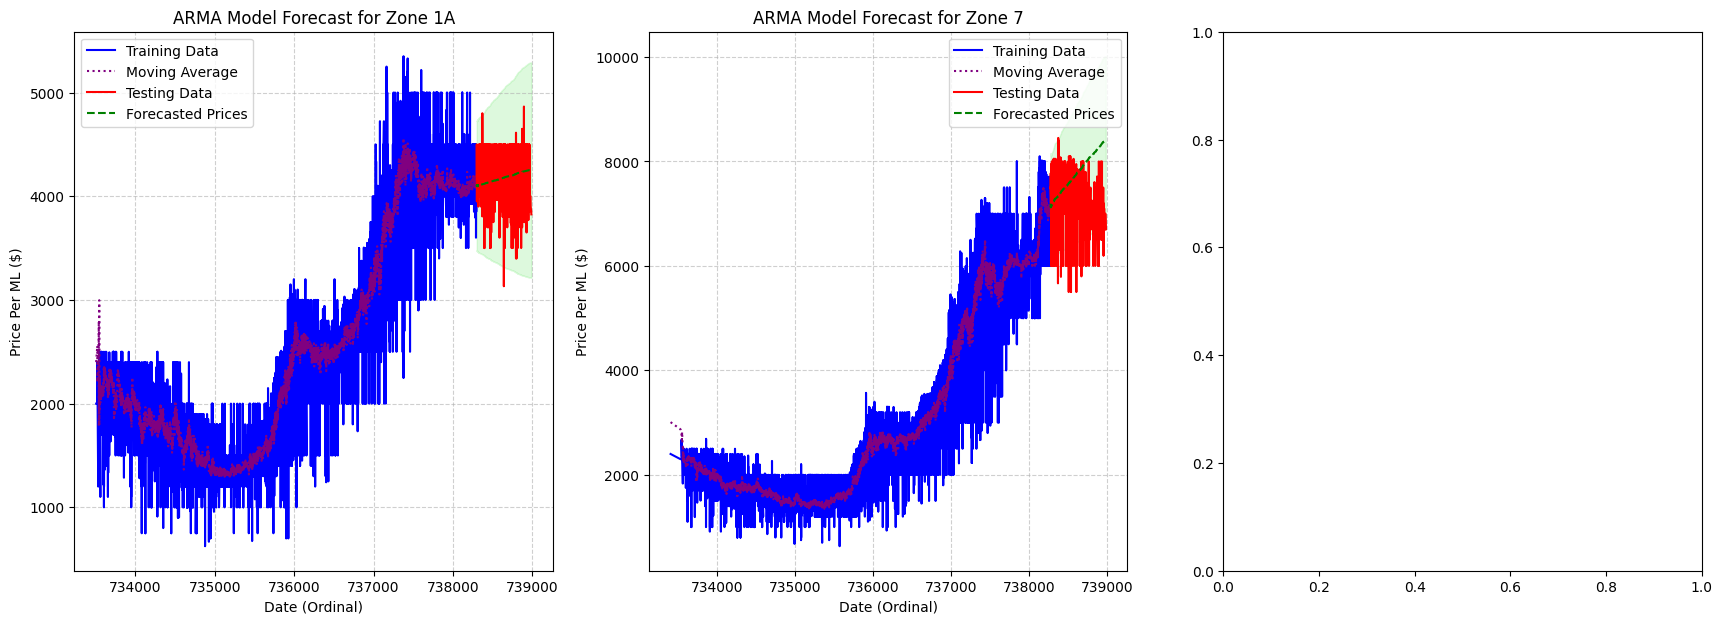

In [4]:
zones = {
    'Zone 1A': zone_data_1A_top_sorted,
    'Zone 7': zone_data_7_top_sorted,
    'Zone 6': zone_data_6_top_sorted
}

stats_data = []

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))  # Adjusted for 3 columns

for i, (zone_name, zone_data) in enumerate(zones.items()):
    series_data = zone_data.set_index('Create_date_ordinal')['Price Per ML ($)']
    train_data, test_data = train_test_split(series_data, test_size=0.1, shuffle=False)
    
    arma_model = build_arma_model(train_data, order=(10, 0, 10))
    forecast_series, conf_df = forecast_and_simulate(arma_model, steps=len(test_data))
    
    # Calculate statistics
    mse = mean_squared_error(test_data, forecast_series)
    mae = mean_absolute_error(test_data, forecast_series)
    r_squared = r2_score(test_data, forecast_series)
    
    stats_data.append({
        'Zone': zone_name,
        'MSE': mse,
        'MAE': mae,
        'R^2': r_squared
    })
    
    ax = axes[i]
    ax.plot(train_data.index, train_data, label="Training Data", color='blue')
    ax.plot(train_data.index, arma_model.fittedvalues, label="Moving Average", color='purple', linestyle=':')
    ax.plot(test_data.index, test_data, label="Testing Data", color='red')
    ax.plot(test_data.index, forecast_series, label="Forecasted Prices", linestyle='--', color='green')
    ax.fill_between(test_data.index, conf_df['lower'], conf_df['upper'], alpha=0.3, color='lightgreen')
    ax.set_title(f"ARMA Model Forecast for {zone_name}")
    ax.set_xlabel("Date (Ordinal)")
    ax.set_ylabel("Price Per ML ($)")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Display statistics in a DataFrame
stats_df = pd.DataFrame(stats_data)
print(stats_df)

# ARIMA

c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\base\m

0


c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-pack

1


c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2


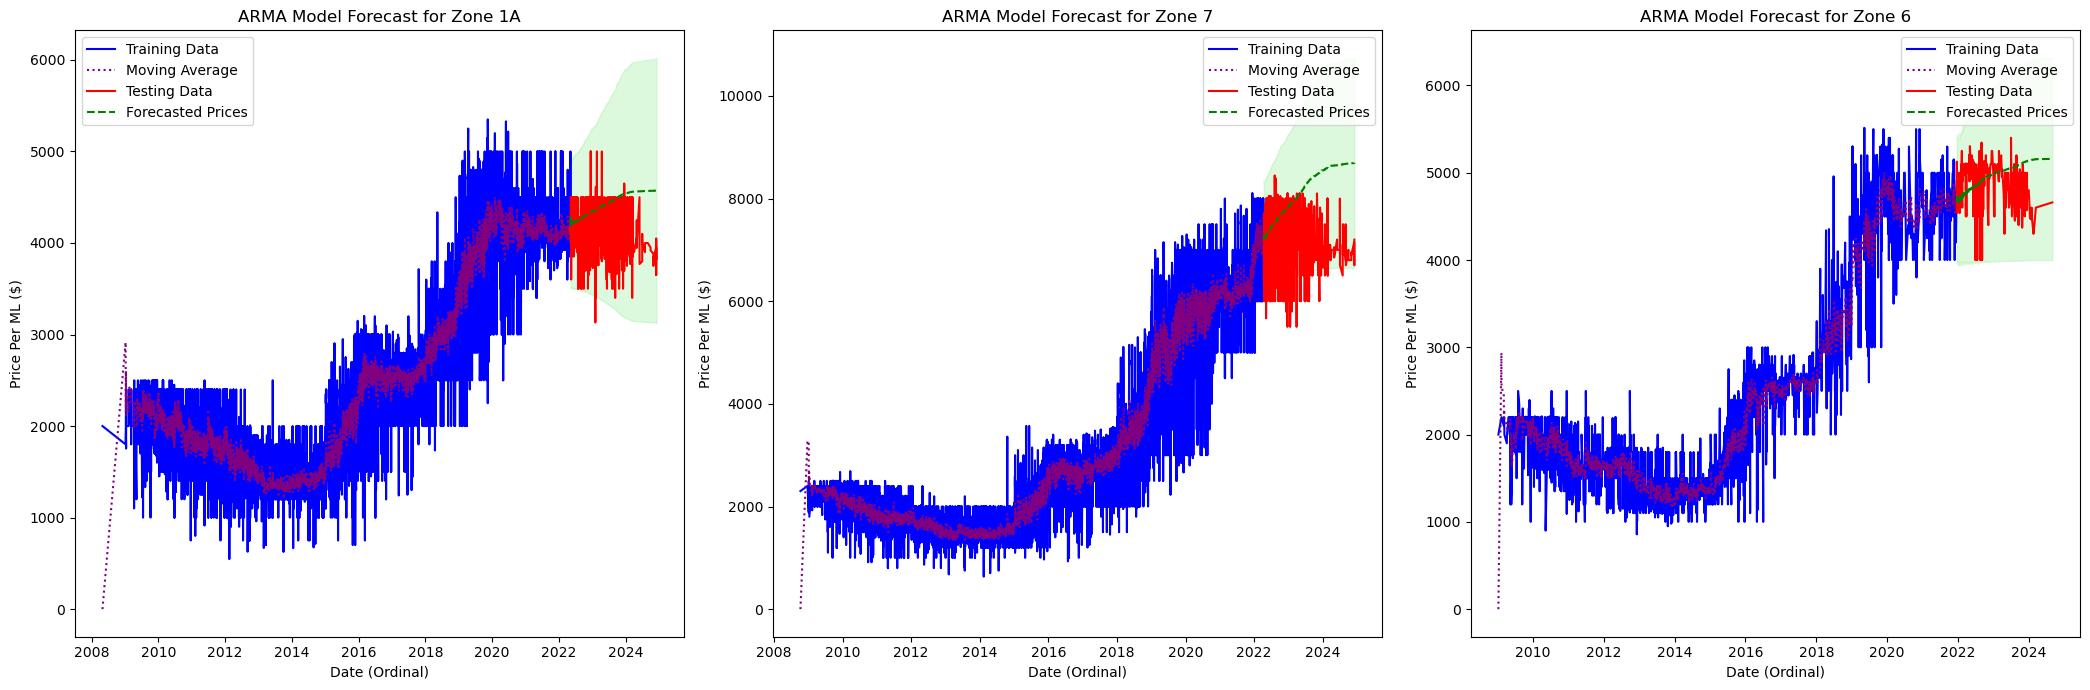

      Zone            MSE         MAE       R^2
0  Zone 1A  163764.526484  346.219863 -2.870068
1   Zone 7  981091.908757  787.373052 -2.463883
2   Zone 6  111082.702911  266.716533 -0.514850


In [ ]:
zones = {
    'Zone 1A': zone_data_1A_top_sorted,
    'Zone 7': zone_data_7_top_sorted,
    'Zone 6': zone_data_6_top_sorted
}

stats_data = []

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))  # Adjusted for 3 columns

for i, (zone_name, zone_data) in enumerate(zones.items()):
    series_data = zone_data.set_index('Create_date_ordinal')['Price Per ML ($)']
    train_data, test_data = train_test_split(series_data, test_size=0.1, shuffle=False)
    
    arma_model = build_arma_model(train_data, order=(10, 2, 10))
    forecast_series, conf_df = forecast_and_simulate(arma_model, steps=len(test_data))
    
    # Calculate statistics
    mse = mean_squared_error(test_data, forecast_series)
    mae = mean_absolute_error(test_data, forecast_series)
    r_squared = r2_score(test_data, forecast_series)
    
    stats_data.append({
        'Zone': zone_name,
        'MSE': mse,
        'MAE': mae,
        'R^2': r_squared
    })
    
    ax = axes[i]

    # Get datetimes
   # train_dates = zone_data.loc[zone_data.Create_date_ordinal.isin(train_data.index), 'Create_date'].unique()
   # test_dates = zone_data.loc[zone_data.Create_date_ordinal.isin(test_data.index), 'Create_date'].unique()
    train_dates = zone_data.drop_duplicates(subset=['Create_date_ordinal']).set_index('Create_date_ordinal').loc[train_data.index, 'Create_date'].astype('datetime64[ns]')
    test_dates = zone_data.drop_duplicates(subset=['Create_date_ordinal']).set_index('Create_date_ordinal').loc[test_data.index, 'Create_date'].astype('datetime64[ns]')
    print(i)
    ax.plot(train_dates, train_data, label="Training Data", color='blue')
    ax.plot(train_dates, arma_model.fittedvalues, label="Moving Average", color='purple', linestyle=':')
    ax.plot(test_dates, test_data, label="Testing Data", color='red')
    ax.plot(test_dates, forecast_series, label="Forecasted Prices", linestyle='--', color='green')
    ax.fill_between(test_dates, conf_df['lower'], conf_df['upper'], alpha=0.3, color='lightgreen')
    ax.set_title(f"ARMA Model Forecast for {zone_name}")
    ax.set_xlabel("Date (Ordinal)")
    ax.set_ylabel("Price Per ML ($)")
    ax.legend()
    #ax.grid(True, linestyle='--', alpha=0.6)

plt.savefig('Zone ARMA.png', dpi=300)
plt.tight_layout()
plt.show()

# Display statistics in a DataFrame
stats_df = pd.DataFrame(stats_data)
print(stats_df)

In [ ]:
train_data.index

Index([733160, 733413, 733417, 733417, 733417, 733417, 733417, 733417, 733417,
       733417,
       ...
       738280, 738280, 738282, 738282, 738283, 738283, 738283, 738283, 738283,
       738283],
      dtype='int64', name='Create_date_ordinal', length=9111)

In [ ]:
zone_data_7_top_sorted.loc[train_data==zone_data_7_top_sorted.Create_date_ordinal, 'Create_date']

ValueError: Can only compare identically-labeled Series objects

In [ ]:
zone_data_1A_top_sorted.loc[zone_data_1A_top_sorted.Create_date_ordinal.isin(train_data.index), ['Create_date_ordinal', 'Create_date']].drop_duplicates().set_index('Create_date_ordinal').loc[train_data.index, :]

,Create_date
Create_date_ordinal,
733160,2008-04-28
733413,2009-01-06
733417,2009-01-10
733417,2009-01-10
733417,2009-01-10
...,...
738283,2022-05-08
738283,2022-05-08
738283,2022-05-08


In [ ]:
zone_data_1A_top_sorted.loc[zone_data_1A_top_sorted.Create_date_ordinal.isin(train_data.index),:].set_index('Create_date_ordinal').loc[train_data.index, 'Create_date']

Create_date_ordinal
733160    2008-04-28
733413    2009-01-06
733417    2009-01-10
733417    2009-01-10
733417    2009-01-10
             ...    
738283    2022-05-08
738283    2022-05-08
738283    2022-05-08
738283    2022-05-08
738283    2022-05-08
Name: Create_date, Length: 65305, dtype: object

In [ ]:
zone_data_1A.Create_date

0        2013-12-07
1        2009-04-30
2        2018-04-13
3        2020-11-29
4        2014-02-14
            ...    
18110    2012-05-11
18111    2020-01-15
18112    2011-05-26
18113    2020-10-12
18114    2018-10-14
Name: Create_date, Length: 18115, dtype: object

In [ ]:
zone_data_6_top_sorted.drop_duplicates(subset=['Create_date_ordinal']).set_index('Create_date_ordinal').loc[train_data.index, 'Create_date'].astype('datetime64[ns]')

Create_date_ordinal
733416   2009-01-09
733447   2009-02-09
733447   2009-02-09
733448   2009-02-10
733472   2009-03-06
            ...    
738139   2021-12-15
738139   2021-12-15
738139   2021-12-15
738140   2021-12-16
738144   2021-12-20
Name: Create_date, Length: 2365, dtype: datetime64[ns]

In [ ]:
pd.DataFrame(train_data).join(zone_data_1A_top_sorted, on="Create_date_ordinal", lsuffix="train", how="cross").dropna()

MergeError: Can not pass on, right_on, left_on or set right_index=True or left_index=True

In [ ]:
train_data.index.shape

(9111,)

In [ ]:
pd.to_datetime(test_data.index)

DatetimeIndex(['1970-01-01 00:00:00.000738284',
               '1970-01-01 00:00:00.000738284',
               '1970-01-01 00:00:00.000738287',
               '1970-01-01 00:00:00.000738288',
               '1970-01-01 00:00:00.000738288',
               '1970-01-01 00:00:00.000738288',
               '1970-01-01 00:00:00.000738291',
               '1970-01-01 00:00:00.000738291',
               '1970-01-01 00:00:00.000738292',
               '1970-01-01 00:00:00.000738293',
               ...
               '1970-01-01 00:00:00.000739194',
               '1970-01-01 00:00:00.000739222',
               '1970-01-01 00:00:00.000739222',
               '1970-01-01 00:00:00.000739222',
               '1970-01-01 00:00:00.000739222',
               '1970-01-01 00:00:00.000739222',
               '1970-01-01 00:00:00.000739223',
               '1970-01-01 00:00:00.000739223',
               '1970-01-01 00:00:00.000739223',
               '1970-01-01 00:00:00.000739224'],
              dtype=

In [ ]:
train_dates

13504    2008-10-09
5746     2008-12-23
5203     2009-01-05
4361     2009-01-06
5662     2009-01-10
            ...    
342      2022-04-14
13365    2022-04-14
28       2022-04-14
13593    2022-04-14
10857    2022-04-14
Name: Create_date, Length: 9002, dtype: object

In [ ]:
zone_data

,Status,Application Creation Date,Approved / Refused Date,Recorded / Rejected Date,Water Share ID,Water System Source,Reliability,Trading Zone Source,Seller Water Authority,Seller Trading Zone Use,Buyer Water Authority,Buyer Trading Zone Use,Volume Traded (ML),Price Per ML ($),Create_date,Create_date_ordinal,Cluster
13504,Refused,2008-10-09,30/04/2010,30/04/2010,WEE****95,Murray,High,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,12.5,2300.00,2008-10-09,733324,0
5746,Recorded,2008-12-23,12/07/2010,23/07/2010,WEE****38,Murray,High,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,94.8,2400.00,2008-12-23,733399,0
5203,Refused,2009-01-05,31/08/2009,31/08/2009,WEE****74,Murray,High,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,24.4,1885.25,2009-01-05,733412,0
4361,Recorded,2009-01-06,02/06/2009,14/07/2009,WEE****23,Murray,High,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,38.9,2500.00,2009-01-06,733413,0
5662,Refused,2009-01-10,05/10/2009,05/10/2009,WEE****76,Murray,High,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,168.0,2400.00,2009-01-10,733417,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,Recorded,2024-12-01,25/01/2024,20/02/2024,WEE****63,Murray,High,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,20.0,7150.00,2024-12-01,739221,0
11452,Recorded,2024-12-02,13/02/2024,21/02/2024,WEE****64,Murray,High,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,3.0,6800.00,2024-12-02,739222,0
5401,Recorded,2024-12-03,21/03/2024,03/04/2024,WEE****56,Murray,High,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,3.0,6700.00,2024-12-03,739223,0
1644,Recorded,2024-12-03,13/03/2024,17/04/2024,WEE****21,Murray,High,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,1.5,7000.00,2024-12-03,739223,0


In [ ]:
filtered_data = pd.read_csv('filtered_data.csv', index_col=0, parse_dates=['Create_date'])


,Status,Application Creation Date,Approved / Refused Date,Recorded / Rejected Date,Water Share ID,Water System Source,Reliability,Trading Zone Source,Seller Water Authority,Seller Trading Zone Use,Buyer Water Authority,Buyer Trading Zone Use,Volume Traded (ML),Price Per ML ($),Create_date
18520,Recorded,23/12/2008,12/07/2010,23/07/2010,WEE****38,Murray,High,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,94.8,2400.00,2008-12-23
38206,Recorded,20/03/2009,23/06/2009,10/08/2009,WEE****22,Loddon,High,5A Loddon - CC/Tull to LWP,Goulburn-Murray Water,5A Loddon - CC/Tull to LWP,Goulburn-Murray Water,5A Loddon - CC/Tull to LWP,2.0,2000.00,2009-03-20
24128,Recorded,09/04/2009,14/08/2009,12/10/2009,WEE****70,Goulburn,High,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,Goulburn-Murray Water,6B Lower Broken Creek,2.0,2000.00,2009-04-09
42996,Recorded,23/04/2009,13/05/2009,13/07/2009,WEE****78,Goulburn,High,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,20.0,2200.00,2009-04-23
37073,Recorded,23/04/2009,13/05/2009,06/07/2009,WEE****13,Murray,High,6 VIC Murray - Dart to Barmah,Goulburn-Murray Water,6 VIC Murray - Dart to Barmah,Goulburn-Murray Water,6 VIC Murray - Dart to Barmah,200.0,2200.00,2009-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,Recorded,04/04/2024,11/04/2024,17/04/2024,WEE****32,Goulburn,High,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,4.0,3900.00,2024-04-04
2953,Recorded,09/04/2024,16/04/2024,18/04/2024,WEE****51,Murray,High,7 VIC Murray - Barmah to SA,Goulburn-Murray Water,7 VIC Murray - Barmah to SA,Lower Murray Water,7 VIC Murray - Barmah to SA,20.0,6700.00,2024-04-09
28276,Recorded,11/04/2024,16/04/2024,24/04/2024,WEE****76,Goulburn,High,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,20.0,3850.00,2024-04-11
33102,Recorded,11/04/2024,12/04/2024,26/04/2024,WEE****78,Goulburn,High,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,Goulburn-Murray Water,1A Greater Goulburn,100.0,3850.00,2024-04-11


In [ ]:
def run_arma(train_data, test_data, order=(10, 2, 10), predictive_col='Price Per ML ($)'):
    
    arma_model = build_arma_model(train_data.reset_index()[predictive_col], order=order)
    forecast_series, conf_df = forecast_and_simulate(arma_model, steps=len(test_data))
    
    df = pd.concat([pd.DataFrame(np.zeros((train_data.shape[0], 2)), columns=conf_df.columns), conf_df])
   # df = df.assign(value=pd.concat([train_data.reset_index()[predictive_col], forecast_series]), start=len(train_data))
    #df = df.assign(value=pd.concat([train_data[predictive_col], forecast_series]), start=len(train_data))
    df = df.assign(value=pd.concat([train_data.reset_index()[predictive_col], forecast_series]), start=len(train_data))
    
    return df

In [ ]:
# Create a monthly aggregate
zone_data = zone_data_6
zone_data.Create_date = pd.to_datetime(zone_data.Create_date)
grouped = zone_data.groupby(pd.Grouper(key="Create_date", freq='M'))
zone_data = grouped[["Price Per ML ($)", "Volume Traded (ML)"]].median().fillna(0)
zone_data["Volume Traded (ML)"] =grouped["Volume Traded (ML)"].sum().fillna(0)

C:\Users\Meredith\AppData\Local\Temp\ipykernel_26916\3893002287.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = zone_data.groupby(pd.Grouper(key="Create_date", freq='M'))


In [ ]:
zone_data

,Price Per ML ($),Volume Traded (ML)
Create_date,,
2009-04-30,2200.0,544.0
2009-05-31,2200.0,1214.1
2009-06-30,2100.0,1413.0
2009-07-31,2200.0,11562.2
2009-08-31,2000.0,2050.0
...,...,...
2023-11-30,4585.0,531.9
2023-12-31,4600.0,609.6
2024-01-31,4537.5,82.1


In [ ]:
#zone_data = zone_data_1A_top_sorted.groupby('Create_date_ordinal').mean(numeric_only=True).sort_index()['Price Per ML ($)']
stop_val=100
dfs_price = []
dfs_volume = []

# Run arma for different starting times to use in optimisation (could call every time an evaluation is needed but this saves computation)
for start in np.arange(int(10), len(zone_data)):
    train_data = zone_data[:start]#.reset_index()
    test_data = zone_data[start:]#.reset_index()
    dfs_price.append(run_arma(train_data, test_data, predictive_col="Price Per ML ($)"))
    dfs_volume.append(run_arma(train_data, test_data, predictive_col="Volume Traded (ML)"))

c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Meredith\anaconda3\envs\ELEN90088\lib\site-packages\

In [ ]:
pd.concat(dfs_price)

,lower,upper,value,start
0,0.000000,0.000000,2200.000000,90
1,0.000000,0.000000,2200.000000,90
2,0.000000,0.000000,2100.000000,90
3,0.000000,0.000000,2200.000000,90
4,0.000000,0.000000,2000.000000,90
...,...,...,...,...
175,0.000000,0.000000,4585.000000,179
176,0.000000,0.000000,4600.000000,179
177,0.000000,0.000000,4537.500000,179
178,0.000000,0.000000,4440.000000,179


In [ ]:
pd.concat(dfs_price).to_csv('ARMA_output_Price.csv')
pd.concat(dfs_volume).to_csv('ARMA_output_Volume.csv')

In [ ]:
import gc
del series_data
del series_top
gc.collect()

793901

In [ ]:
train_data["Volume Traded (ML)"]

Create_date
2009-04-30    200.00
2009-05-31     78.60
2009-06-30     90.75
2009-07-31    169.60
2009-08-31     47.10
2009-09-30    162.65
2009-10-31    165.85
2009-11-30     10.00
2009-12-31     96.80
2010-01-31     80.00
2010-02-28     36.15
2010-03-31     17.00
2010-04-30     60.70
2010-05-31     18.00
2010-06-30     39.00
2010-07-31    107.15
2010-08-31    116.00
2010-09-30     11.00
2010-10-31      4.30
2010-11-30     68.05
2010-12-31     55.00
2011-01-31    122.10
2011-02-28     49.90
2011-03-31     69.70
2011-04-30     50.00
2011-05-31     22.05
2011-06-30     40.00
2011-07-31    130.00
2011-08-31    158.70
2011-09-30     13.00
Freq: ME, Name: Volume Traded (ML), dtype: float64